In [1]:
#All paths
main_path="D:/Visual/Project/Image_Classification/Hand"
data_path="D:/Visual/Project/Image_Classification/Data/Hand_1"
function_path="D:/Visual/Project/Image_Classification/Functions"
model_path="/Models/Model_3.h5"

In [2]:
# import splitfolders
# splitfolders.ratio("D:\Visual\Project\Image_Classification\Data\Hand", output="D:\Visual\Project\Image_Classification\Data\Hand_1",seed=42, ratio=(0.7, 0.15, 0.15)) # default values

In [3]:
import os
import sys
import json

sys.path.insert(0,function_path)

# importing module1 from another folder
from Json import *

# d=Call_Dictionary(path)
# Create_Json(name,path,d)

d=Access_Json(data_path+"/Hand.json")

In [4]:
class_name=list(d['Test'])[:-1]
print(class_name)

['paper', 'rock', 'scissors']


Image shape: (200, 300, 3)


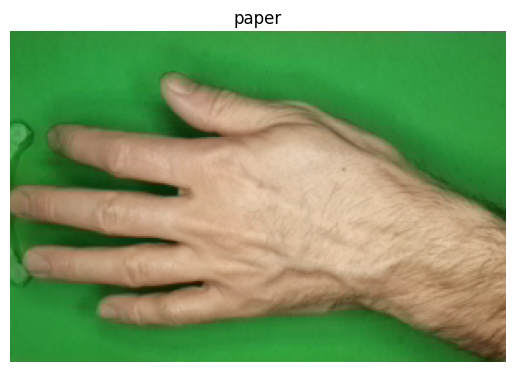

In [5]:
from Image import *
img = view_random_image(target_dir=data_path+"/train/",target_class="paper")

In [6]:
#Path
train_path=data_path+"/train"
test_path=data_path+"/test"
val_path=data_path+"/val"

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator training instance with data augmentation
# train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
#                                              rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
#                                              shear_range=0.2, # shear the image
#                                              zoom_range=0.2, # zoom into the image
#                                              width_shift_range=0.2, # shift the image width ways
#                                              height_shift_range=0.2, # shift the image height ways
#                                              horizontal_flip=True) # flip the image on the horizontal axis


# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_path,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') 

# train_datagen_augmented= train_datagen_augmented.flow_from_directory(train_path,
#                                                target_size=(224, 224),
#                                                batch_size=32,
#                                                class_mode='categorical') 

val_data = train_datagen.flow_from_directory(val_path,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')


test_data = train_datagen.flow_from_directory(test_path,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 1531 images belonging to 3 classes.
Found 326 images belonging to 3 classes.
Found 331 images belonging to 3 classes.


In [8]:
len(train_data),len(val_data),len(test_data)

(48, 11, 11)

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

tf.random.set_seed(42)
# Create our model (a clone of model_8, except to be multi-class)
model_baseline= Sequential([
  Conv2D(16, 3, activation='relu', input_shape=(224, 224, 3)),
  
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
            padding="valid"), # padding can also be 'same'
  
  Conv2D(16, 3, activation='relu'),
  
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
            padding="valid"), # padding can also be 'same'

  Conv2D(16, 3, activation='relu'),
  
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
            padding="valid"), # padding can also be 'same'
  
  Flatten(),
  Dense(3, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_baseline.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_baseline = model_baseline.fit(train_data, # now 10 different classes 
                            epochs=5,
                            steps_per_epoch=len(train_data),
                            validation_data=val_data,
                            validation_steps=len(val_data))

Epoch 1/5
48/48 [==============================] - 110s 2s/step - loss: 0.6061 - accuracy: 0.7557 - val_loss: 0.3937 - val_accuracy: 0.8650
Epoch 2/5
48/48 [==============================] - 107s 2s/step - loss: 0.2307 - accuracy: 0.9210 - val_loss: 0.2949 - val_accuracy: 0.9080
Epoch 3/5
48/48 [==============================] - 128s 3s/step - loss: 0.1309 - accuracy: 0.9562 - val_loss: 0.2201 - val_accuracy: 0.9356
Epoch 4/5
48/48 [==============================] - 104s 2s/step - loss: 0.0772 - accuracy: 0.9765 - val_loss: 0.1366 - val_accuracy: 0.9571
Epoch 5/5
48/48 [==============================] - 103s 2s/step - loss: 0.0561 - accuracy: 0.9791 - val_loss: 0.1479 - val_accuracy: 0.9632


In [10]:
model_baseline.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 16)      4624      
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                    

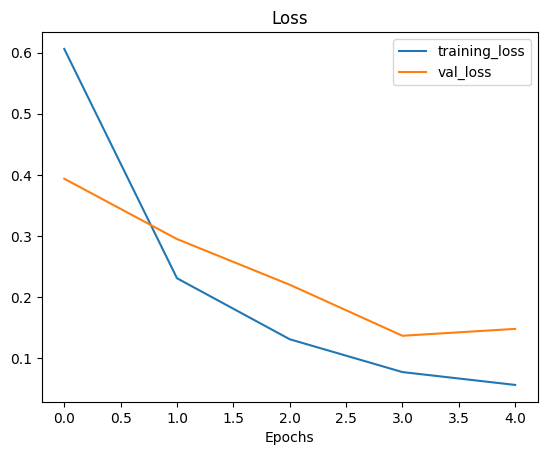

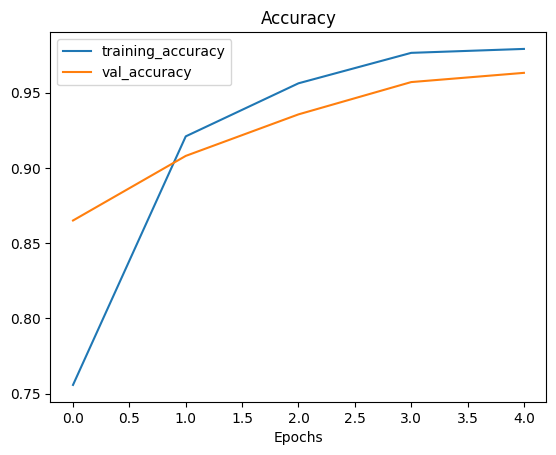

In [16]:
from Plot import plot_loss_curves
plot_loss_curves(history_baseline)

In [12]:
model_baseline.save(main_path+model_path)

In [15]:
#Evaluation the model
loss,acc=model_baseline.evaluate(test_data)
acc=acc*100
print(loss," ",acc,"%")

11/11 [==============================] - 5s 457ms/step - loss: 0.1829 - accuracy: 0.9366
0.1828986555337906   93.65558624267578 %


In [19]:
loaded_saved_model = tf.keras.models.load_model("D:/Visual/Project/Image_Classification/Hand/Models/Model_2.h5")
loaded_saved_model.evaluate(test_data)

11/11 [==============================] - 4s 353ms/step - loss: 0.2003 - accuracy: 0.9456


[0.20028525590896606, 0.9456193447113037]